# MODEL TRAINING 

# 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
#Basic import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost  import XGBRegressor
import warnings

# Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('Data/StudentsPerformance.csv')

# Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing x and y variables

In [4]:
x=df.drop(columns=['math score'],axis=1)

In [5]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [7]:
y=df['math score']

In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [10]:
x=preprocessor.fit_transform(x)

In [11]:
x.shape

(1000, 19)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

# Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rsme=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rsme,r2_square

In [14]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Nieghbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor(),
      
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #Train model
    
    # make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    
    model_test_mae,model_test_rsme,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print('- Root Mean Squared Error:{:.4f}'.format(model_test_rsme))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("- R2 Score:{:.4f}".format(model_train_r2))
    print("--------------------------------------------------------")
    
    print("Model performance  for Test set")
    print("- Root mean Squared Error:{:.4f}".format(model_test_rsme))
    print("- Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("- R2 score:{:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error:5.4214
- Mean Absolute Error:4.2723
- R2 Score:0.8735
--------------------------------------------------------
Model performance  for Test set
- Root mean Squared Error:5.4214
- Mean Absolute Error:4.2253
- R2 score:0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error:6.5197
- Mean Absolute Error:5.2063
- R2 Score:0.8071
--------------------------------------------------------
Model performance  for Test set
- Root mean Squared Error:6.5197
- Mean Absolute Error:5.1579
- R2 score:0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error:5.3904
- Mean Absolute Error:4.2650
- R2 Score:0.8743
--------------------------------------------------------
Model performance  for Test set
- Root mean Squared Error:5.3904
- Mean Absolute Error:4.2111
- R2 score:0.8806


K-Nieghbors Regressor
Model performance for Training set
- Root Mean Squared Error:7.2583
- Mean Absolute Error:

c:\Users\HP\.conda\envs\ml\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor
Model performance for Training set
- Root Mean Squared Error:6.5889
- Mean Absolute Error:0.6148
- R2 Score:0.9963
--------------------------------------------------------
Model performance  for Test set
- Root mean Squared Error:6.5889
- Mean Absolute Error:5.0844
- R2 score:0.8216


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error:6.0086
- Mean Absolute Error:2.4054
- R2 Score:0.9589
--------------------------------------------------------
Model performance  for Test set
- Root mean Squared Error:6.0086
- Mean Absolute Error:4.6125
- R2 score:0.8516


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error:6.0604
- Mean Absolute Error:4.7951
- R2 Score:0.8479
--------------------------------------------------------
Model performance  for Test set
- Root mean Squared Error:6.0604
- Mean Absolute Error:4.7457
- R2 score:0.8491




# Results

In [15]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879526
5,Random Forest Regressor,0.852814
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.845984
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Nieghbors Regressor,0.783193
4,Decision Tree,0.770032


# Linear Regression

In [16]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 87.95


# Plot y_pred and y_test

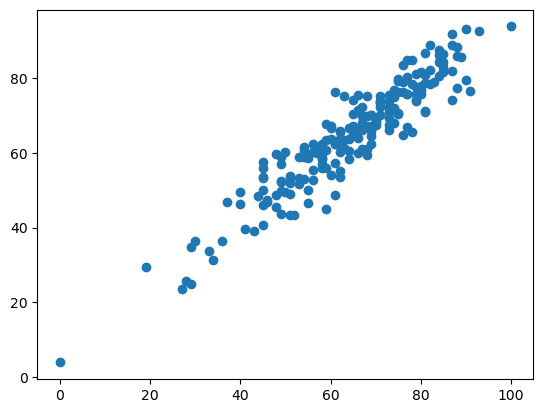

In [17]:
plt.scatter(y_test,y_pred)

<AxesSubplot:xlabel='math score'>

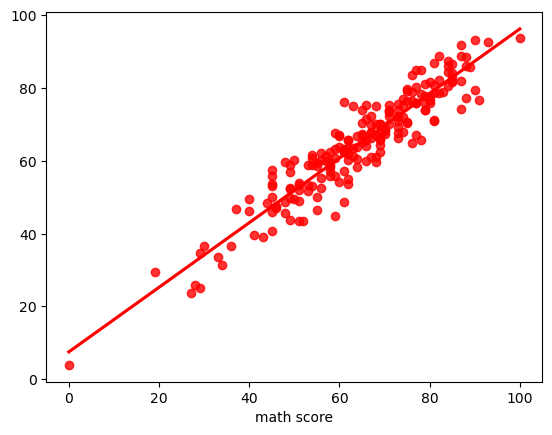

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

In [19]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,"Difference":y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
521,91,76.628906,14.371094
737,53,58.843750,-5.843750
740,80,76.757812,3.242188
660,74,76.847656,-2.847656
411,84,87.464844,-3.464844
...,...,...,...
408,52,43.332031,8.667969
332,62,61.949219,0.050781
208,74,67.863281,6.136719
613,65,67.253906,-2.253906
